<a href="https://colab.research.google.com/github/toryn13/stats_files/blob/main/Full_BIOC0003_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hi, the hash means that colab will ignore this text - that is why it is green
!pip install FlowCal==1.3.0 #this line will install the 1.3.0 version of FlowCal
#this website has the documentation on its functions: https://flowcal.readthedocs.io/en/latest/
#some python libraries are as well documented as this one...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.3 MB/s eta 0:00:00
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84527 sha256=c6a108bd99f45bf5ae1c2f3ee019a3469b15d5a0b816ca4b9fd6cb727778a3c6
  Stored in directory: /root/.cache/pip/wheels/b1/9c/f3/4c59694424e6a6d70b11b66f076d8a2359b57dfdb9b723ed3f
Successfully built FlowCal
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import FlowCal #even though it is installed, you still have to tell python that you plan to use it!
#numpy is so important it comes pre-installed, it's very useful for handling multi-dimensional arrays (arrays = a fancy way of saying tables)
import numpy as np #the 'as np' part means from now on we can write np instead of numpy
import matplotlib.pyplot as plt #this is a library for plotting graphs

#FlowCal relies on numpy and matplotlib to function

In [ ]:
!wget https://char7927.github.io/BIOC0003/file1.fcs#the negative control
!wget https://char7927.github.io/BIOC0003/file2.fcs#the positive control
!wget https://char7927.github.io/BIOC0003/file3.fcs#the mutant

--2023-11-28 20:55:20--  https://char7927.github.io/BIOC0003/file1.fcs
Resolving char7927.github.io (char7927.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to char7927.github.io (char7927.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 952742 (930K) [application/vnd.isac.fcs]
Saving to: ‘file1.fcs’

file1.fcs           100%[===================>] 930.41K  --.-KB/s    in 0.07s   

2023-11-28 20:55:21 (13.8 MB/s) - ‘file1.fcs’ saved [952742/952742]

--2023-11-28 20:55:21--  https://char7927.github.io/BIOC0003/file2.fcs
Resolving char7927.github.io (char7927.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to char7927.github.io (char7927.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4272033 (4.1M) [application/vnd.isac.fcs]
Saving to: ‘file2.fcs’

file2.fcs           100%[===================>]   4.07M  --.-KB/s    in 0.

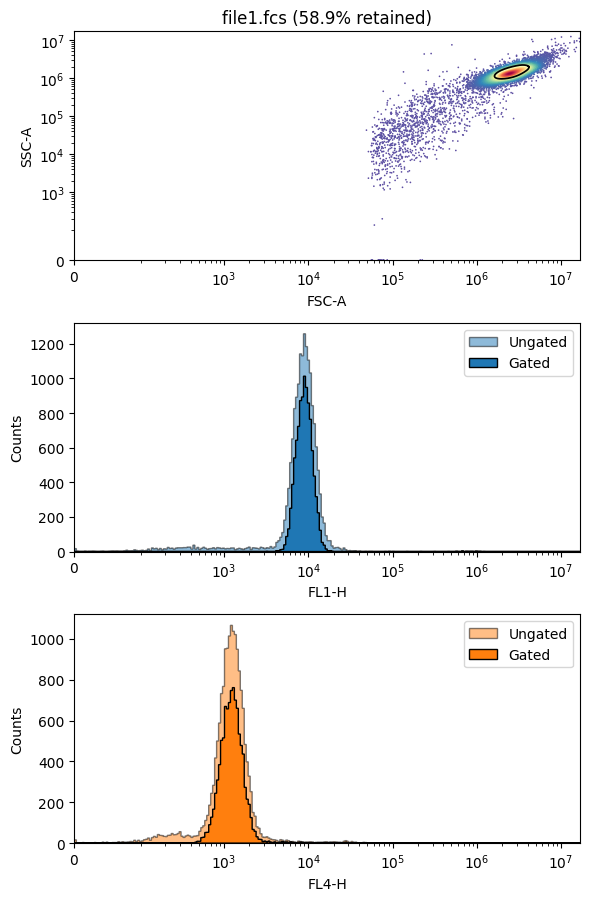

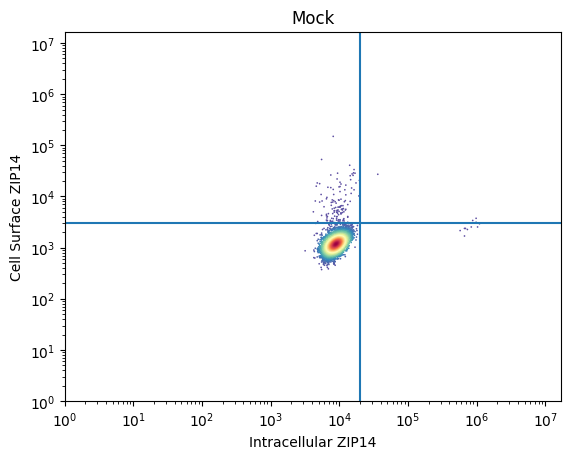

In [ ]:
chans = ['FL1-H','FL4-H']#the channels for measuring fluorescence of my antibodies
titles = ['Mock','Wild-type','F98V mutant']
xlimit = 20000#upper threshold of the negative control's FL1 fluorescence
y_low_limit = 400#lower threshold of the negative control's FL4 fluorescence
y_up_limit = 3000

transformedFile = FlowCal.transform.to_rfi(FlowCal.io.FCSData('file1.fcs'))#reformats data
gate_frac = 10000/transformedFile.shape[0]#what fraction of the events will give 10,000 events for analysis
#special function that creates a contour for gating
gatedFile = FlowCal.gate.density2d(transformedFile,gate_fraction=gate_frac,xscale='log',yscale='log',full_output=True)
#special function that shows the effect of the gating
FlowCal.plot.density_and_hist(transformedFile,gatedFile.gated_data,gatedFile.contour,[0,1],{'mode':'scatter'},chans)
plt.tight_layout()
plt.show()
#makes density plot of selected data
FlowCal.plot.density2d(gatedFile.gated_data,chans,mode='scatter',xscale='log',yscale='log',xlabel='Intracellular ZIP14',ylabel="Cell Surface ZIP14",title=titles[0])
#shows the cutoff point of the thresholds
plt.axvline(xlimit)
plt.axhline(y_up_limit)
plt.show()

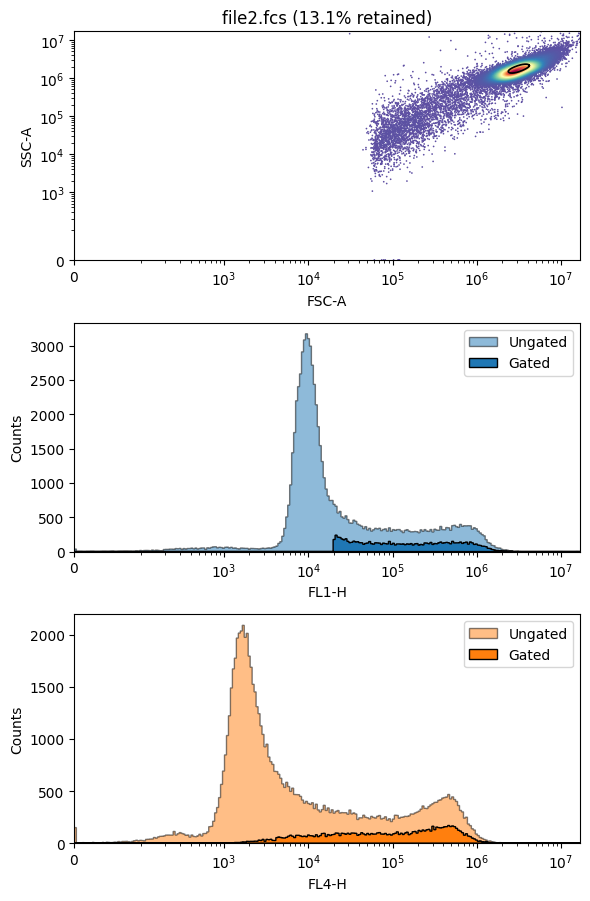

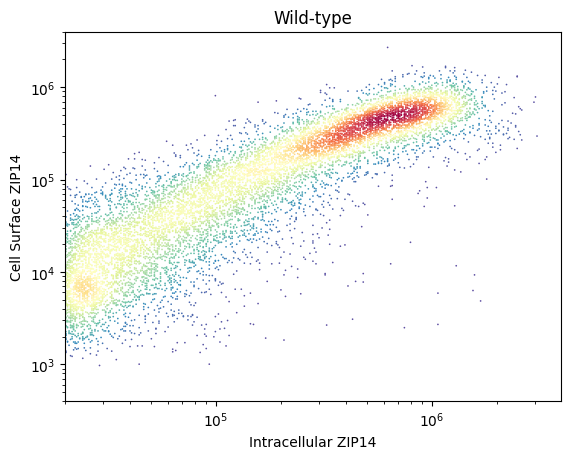

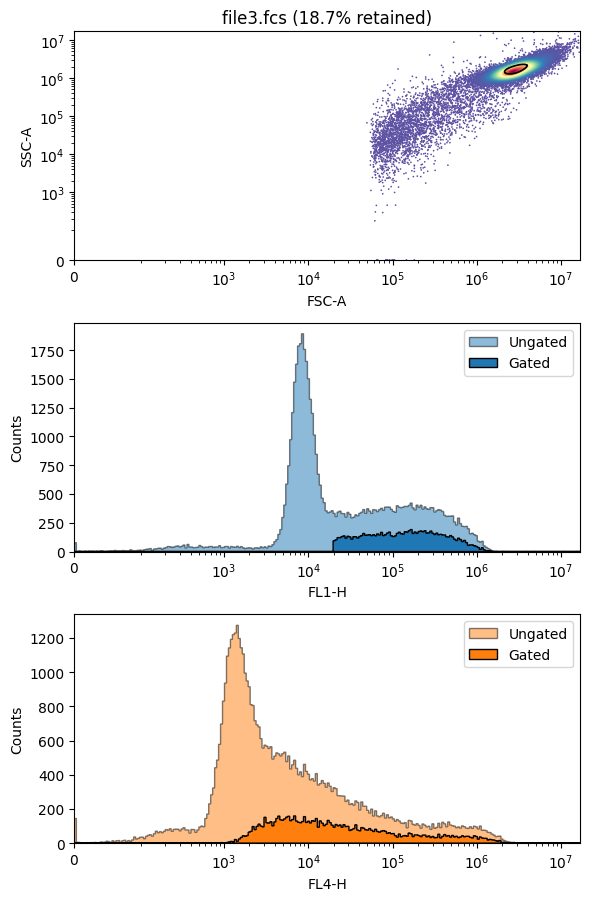

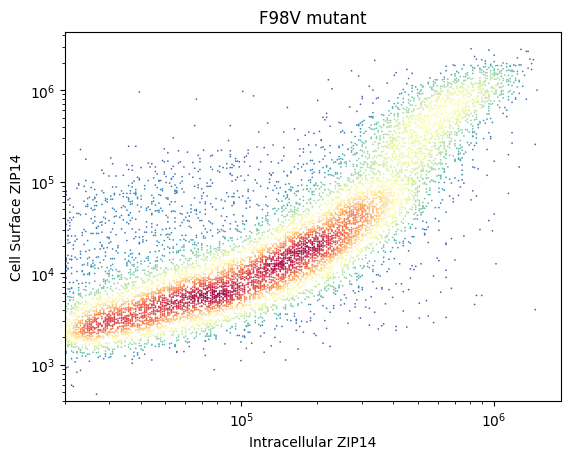

In [ ]:
transformedFiles = []#to keep the transformed data
gatedFiles = []#to keep the gated versions of the data
transformedFiles.append(transformedFile)#add the mock data from above
gatedFiles.append(gatedFile.gated_data)
for i in range(2,4):#go through the rest of the files
  transformedFile_i = FlowCal.transform.to_rfi(FlowCal.io.FCSData('file'+str(i)+'.fcs'))
  transformedFiles.append(transformedFile_i)
  #additional gating is needed so we can focus on the cells expressing ZIP14 - use xlimit from mock
  firstGate_i = FlowCal.gate.high_low(transformedFile_i,chans[0],low=xlimit,full_output=True)
  gate_frac = 10000/firstGate_i.gated_data.shape[0]
  secondGate_i = FlowCal.gate.density2d(firstGate_i.gated_data,gate_fraction=gate_frac,xscale='log',yscale='log',full_output=True)
  gatedFiles.append(secondGate_i.gated_data)
  FlowCal.plot.density_and_hist(transformedFile_i,secondGate_i.gated_data,secondGate_i.contour,[0,1],{'mode':'scatter'},chans)
  plt.tight_layout()
  plt.show()
  FlowCal.plot.density2d(secondGate_i.gated_data,chans,mode='scatter',xscale='log',yscale='log',xlabel='Intracellular ZIP14',ylabel="Cell Surface ZIP14",title=titles[i-1],xlim=xlimit,ylim=ylimit)